In [90]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

### Normal Distribution's Function

In [91]:
def normal_dist(x, mean, std):
    return norm.pdf(x, mean, std)

In [92]:
female_params = {
    "mean": 165,
    "std": 9
}
male_params = {
    "mean": 180,
    "std": 9
}
start, end, = 130, 220
x = np.linspace(start, end, 2000)

### Likelihood P(x|y)

In [93]:
female_likelihood = normal_dist(x, female_params["mean"], female_params["std"])
male_likelihood = normal_dist(x, male_params["mean"], male_params["std"])

### Priors P(y)

In [94]:
female_prior = {
    "balanced": 0.5,
    "unbalanced": 0.1
}
male_prior = {
    "balanced": 0.5,
    "unbalanced": 0.9
}

### Evidence P(x)

In [95]:
# evidence = female_likelihood * female_prior + male_likelihood * male_prior
evidence = {
    "balanced": female_likelihood * female_prior["balanced"] + male_likelihood * male_prior["balanced"],
    "prior_unbalanced": female_likelihood * female_prior["unbalanced"] + male_likelihood * male_prior["unbalanced"],
}

### Bayes Theorem / Posterior P(y|x)

In [96]:
# female_posterior = (female_likelihood * female_prior) / evidence
# male_posterior = (male_likelihood * male_prior) / evidence

female_posterior = {
    "balanced": (female_likelihood * female_prior["balanced"]) / evidence["balanced"],
    "unbalanced": (female_likelihood * female_prior["unbalanced"]) / evidence["prior_unbalanced"]
}
male_posterior = {
    "balanced": (male_likelihood * male_prior["balanced"]) / evidence["balanced"],
    "unbalanced": (male_likelihood * male_prior["unbalanced"]) / evidence["prior_unbalanced"]
}

decision_boundary = {
    "balanced": x[np.unique(female_posterior["balanced"] <= 0.5, return_counts=True)[1][0] - 1],
    "unbalanced": x[np.unique(female_posterior["unbalanced"] <= 0.5, return_counts=True)[1][0] - 1]
}

### Loss Values

In [97]:
female_loss = 0.5 # l(f, m')
male_loss = 0.5 # l(m, f')

### Conditional Error L(y|x)

#### Conditional Error with 0-1 Loss

In [98]:
female_conditional_error = {
    "balanced": male_loss * male_posterior["balanced"],
    "unbalanced": male_loss * male_posterior["unbalanced"]
}
male_conditional_error = {
    "balanced": female_loss * female_posterior["balanced"],
    "unbalanced": female_loss * female_posterior["unbalanced"]
}

#### Conditional Error with unbalanced Loss

In [99]:
m_loss = 0.9
f_loss = 0.1

male_conditional_error_unbalanced_loss = f_loss * female_posterior["balanced"]
female_conditional_error_unbalanced_loss = m_loss * male_posterior["balanced"]

#### Conditional Error with unbalanced Loss and Priors

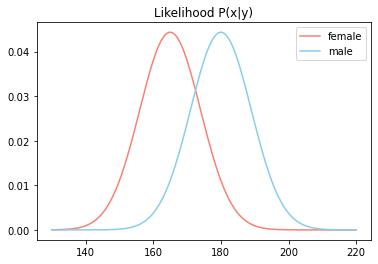

In [134]:
male_conditional_error_unbalanced_loss_prior = f_loss * female_posterior["unbalanced"]
female_conditional_error_unbalanced_loss_prior = m_loss * male_posterior["unbalanced"]

plt.plot(x, female_likelihood, color="salmon", label="female")
plt.plot(x, male_likelihood, color="skyblue", label="male")
plt.title("Likelihood P(x|y)")
plt.legend()
plt.show()

### How the posteriors and the decision boundary of the Bayes classifier depend on the priors for a fixed 0-1 loss?

We use 0.5 for both female and male fixed 0-1 loss 

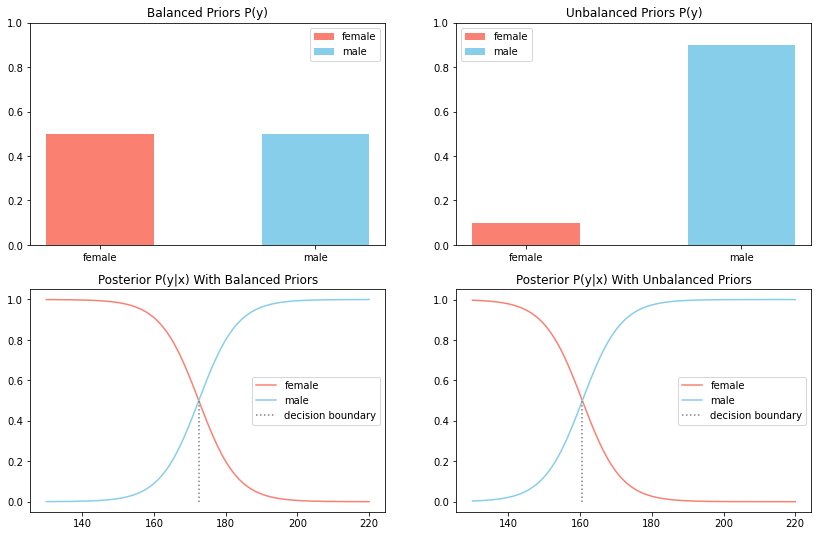

In [132]:
fig, ax = plt.subplots(2, 2, figsize=(14, 9))

ax[0, 1].bar("female", female_prior["unbalanced"], width=0.5, color="salmon", label="female")
ax[0, 1].bar("male", male_prior["unbalanced"], width=0.5, color="skyblue", label="male")
ax[0, 1].set_ylim([0, 1])
ax[0, 1].set_title("Unbalanced Priors P(y)")

ax[1, 1].plot(x, female_posterior["unbalanced"], color="salmon", label="female")
ax[1, 1].plot(x, male_posterior["unbalanced"], color="skyblue", label="male")
ax[1, 1].vlines(decision_boundary["unbalanced"], 0, 0.5, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 1].set_title("Posterior P(y|x) With Unbalanced Priors")

ax[0, 0].bar("female", female_prior["balanced"], width=0.5, color="salmon", label="female")
ax[0, 0].bar("male", male_prior["balanced"], width=0.5, color="skyblue", label="male")
ax[0, 0].set_ylim([0, 1])
ax[0, 0].set_title("Balanced Priors P(y)")

ax[1, 0].plot(x, female_posterior["balanced"], color="salmon", label="female")
ax[1, 0].plot(x, male_posterior["balanced"], color="skyblue", label="male")
ax[1, 0].vlines(decision_boundary["balanced"], 0, 0.5, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 0].set_title("Posterior P(y|x) With Balanced Priors")

for ax in ax.flat:
    ax.legend()

plt.show()

### how the class conditional errors and the decision boundary depend on the loss for fixed priors P(y = f) = P(y = m) = 0.5.

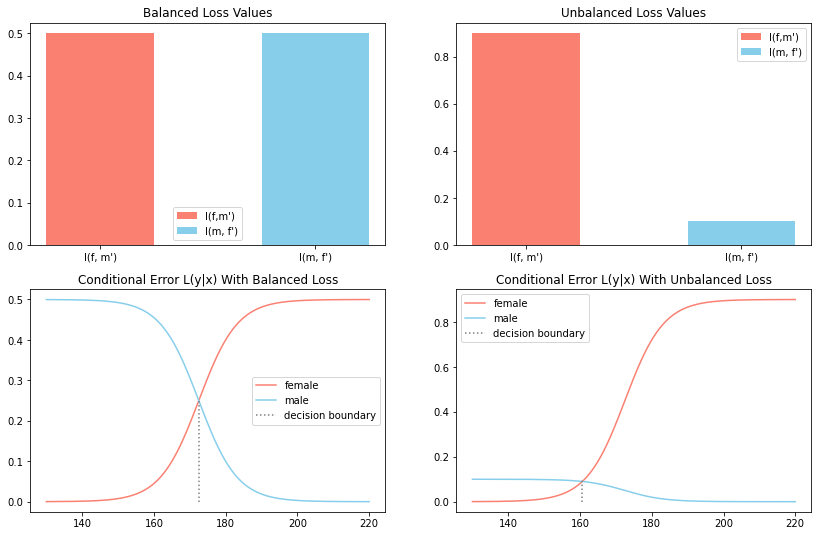

In [151]:
fig, ax = plt.subplots(2, 2, figsize=(14, 9))

ax[0, 0].bar("l(f, m')", female_loss, color="salmon", width=0.5, label="l(f,m')")
ax[0, 0].bar("l(m, f')", male_loss, color="skyblue", width=0.5, label="l(m, f')")
ax[0, 0].set_title("Balanced Loss Values")

ax[0, 1].bar("l(f, m')", 0.9, color="salmon", width=0.5, label="l(f,m')")
ax[0, 1].bar("l(m, f')", 0.1, color="skyblue", width=0.5, label="l(m, f')")
ax[0, 1].set_title("Unbalanced Loss Values")

ax[1, 0].plot(x, female_conditional_error["balanced"], color="salmon", label="female")
ax[1, 0].plot(x, male_conditional_error["balanced"], color="skyblue", label="male")
ax[1, 0].vlines(decision_boundary["balanced"], 0, 0.25, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 0].set_title("Conditional Error L(y|x) With Balanced Loss")

ax[1, 1].plot(x, female_conditional_error_unbalanced_loss, color="salmon", label="female")
ax[1, 1].plot(x, male_conditional_error_unbalanced_loss, color="skyblue", label="male")
ax[1, 1].vlines(x[np.unique(female_posterior["unbalanced"] <= 0.5, return_counts=True)[1][0] - 1], 0, 0.1, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 1].set_title("Conditional Error L(y|x) With Unbalanced Loss")

for ax in ax.flat:
    ax.legend()

plt.show()

## 1. balanced priors and balanced loss (0-1 loss)

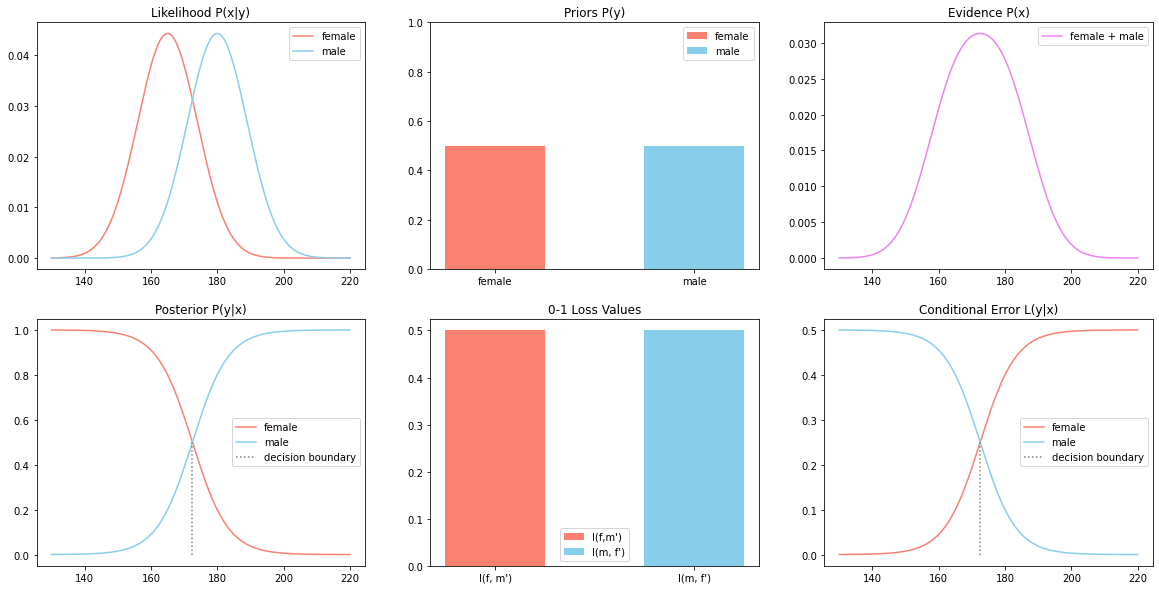

In [101]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0, 0].plot(x, female_likelihood, color="salmon", label="female")
ax[0, 0].plot(x, male_likelihood, color="skyblue", label="male")
ax[0, 0].set_title("Likelihood P(x|y)")

ax[0, 1].bar("female", female_prior["balanced"], width=0.5, color="salmon", label="female")
ax[0, 1].bar("male", male_prior["balanced"], width=0.5, color="skyblue", label="male")
ax[0, 1].set_ylim([0, 1])
ax[0, 1].set_title("Priors P(y)")

ax[0, 2].plot(x, evidence["balanced"], color="violet", label="female + male")
ax[0, 2].set_title("Evidence P(x)")

ax[1, 0].plot(x, female_posterior["balanced"], color="salmon", label="female")
ax[1, 0].plot(x, male_posterior["balanced"], color="skyblue", label="male")
ax[1, 0].vlines(decision_boundary["balanced"], 0, 0.5, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 0].set_title("Posterior P(y|x)")

ax[1, 1].bar("l(f, m')", female_loss, color="salmon", width=0.5, label="l(f,m')")
ax[1, 1].bar("l(m, f')", male_loss, color="skyblue", width=0.5, label="l(m, f')")
ax[1, 1].set_title("0-1 Loss Values")

ax[1, 2].plot(x, female_conditional_error["balanced"], color="salmon", label="female")
ax[1, 2].plot(x, male_conditional_error["balanced"], color="skyblue", label="male")
ax[1, 2].vlines(decision_boundary["balanced"], 0, 0.25, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 2].set_title("Conditional Error L(y|x)")

for ax in ax.flat:
    ax.legend()

plt.show()

## 2. unbalanced priors and balanced loss

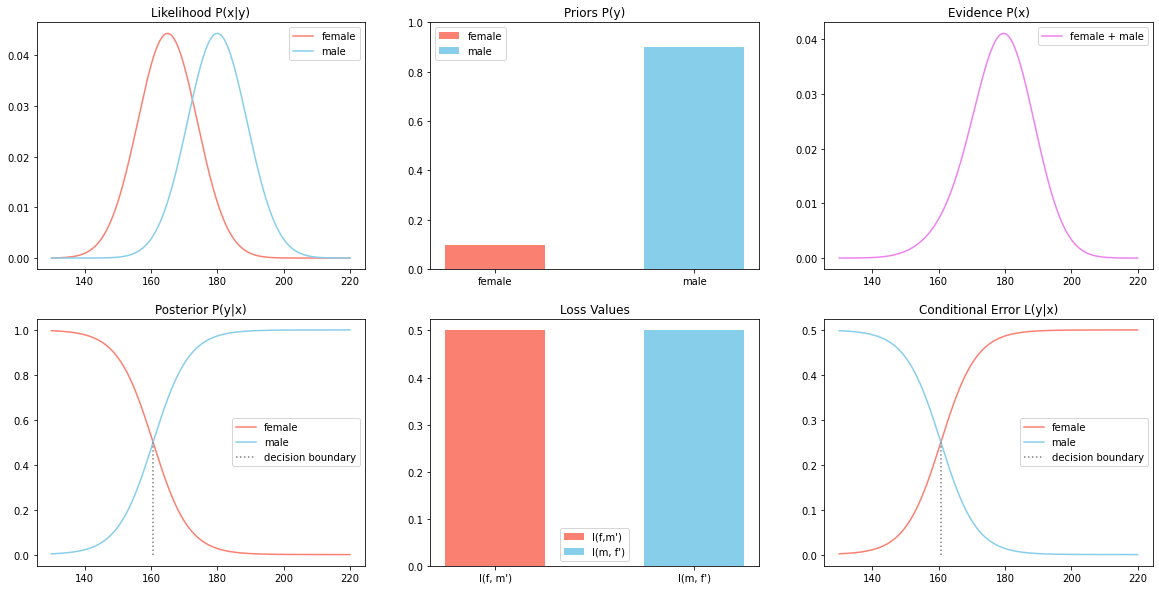

Decision boundary: 160.6153076538269


In [136]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0, 0].plot(x, female_likelihood, color="salmon", label="female")
ax[0, 0].plot(x, male_likelihood, color="skyblue", label="male")
ax[0, 0].set_title("Likelihood P(x|y)")

ax[0, 1].bar("female", female_prior["unbalanced"], width=0.5, color="salmon", label="female")
ax[0, 1].bar("male", male_prior["unbalanced"], width=0.5, color="skyblue", label="male")
ax[0, 1].set_ylim([0, 1])
ax[0, 1].set_title("Priors P(y)")

ax[0, 2].plot(x, evidence["prior_unbalanced"], color="violet", label="female + male")
ax[0, 2].set_title("Evidence P(x)")

ax[1, 0].plot(x, female_posterior["unbalanced"], color="salmon", label="female")
ax[1, 0].plot(x, male_posterior["unbalanced"], color="skyblue", label="male")
ax[1, 0].vlines(decision_boundary["unbalanced"], 0, 0.5, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 0].set_title("Posterior P(y|x)")

ax[1, 1].bar("l(f, m')", female_loss, color="salmon", width=0.5, label="l(f,m')")
ax[1, 1].bar("l(m, f')", male_loss, color="skyblue", width=0.5, label="l(m, f')")
ax[1, 1].set_title("Loss Values")

ax[1, 2].plot(x, female_conditional_error["unbalanced"], color="salmon", label="female")
ax[1, 2].plot(x, male_conditional_error["unbalanced"], color="skyblue", label="male")
ax[1, 2].vlines(decision_boundary["unbalanced"], 0, 0.25, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 2].set_title("Conditional Error L(y|x)")

for ax in ax.flat:
    ax.legend()

plt.show()

print("Decision boundary:" , decision_boundary["unbalanced"])

## 3. balanced priors and unbalanced loss

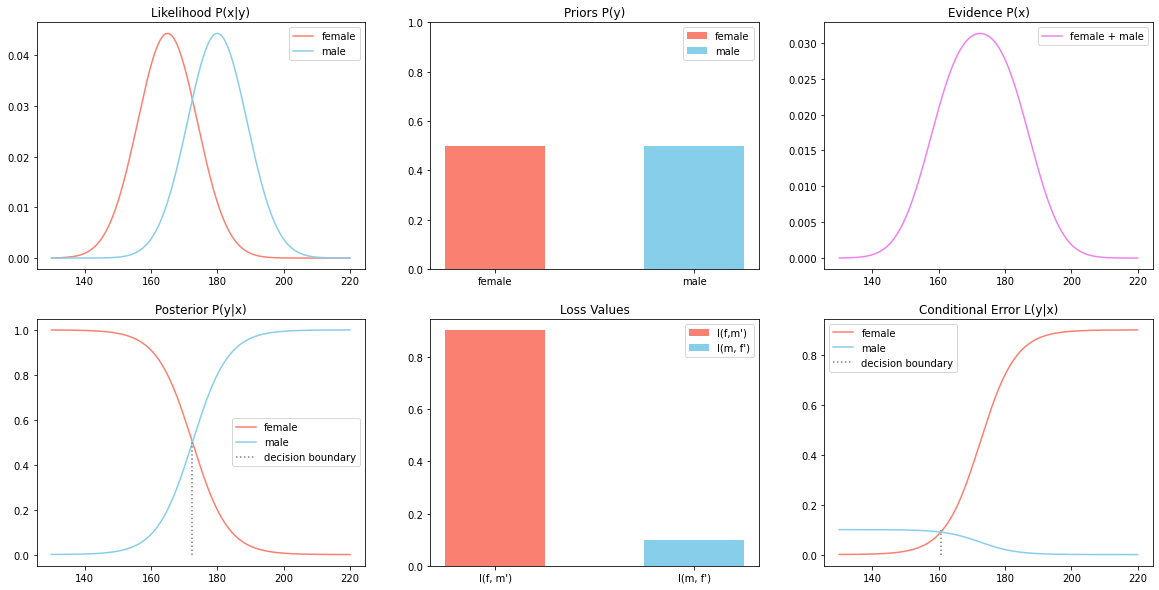

Decision boundary: 160.6153076538269


In [137]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0, 0].plot(x, female_likelihood, color="salmon", label="female")
ax[0, 0].plot(x, male_likelihood, color="skyblue", label="male")
ax[0, 0].set_title("Likelihood P(x|y)")

ax[0, 1].bar("female", female_prior["balanced"], width=0.5, color="salmon", label="female")
ax[0, 1].bar("male", male_prior["balanced"], width=0.5, color="skyblue", label="male")
ax[0, 1].set_ylim([0, 1])
ax[0, 1].set_title("Priors P(y)")

ax[0, 2].plot(x, evidence["balanced"], color="violet", label="female + male")
ax[0, 2].set_title("Evidence P(x)")

ax[1, 0].plot(x, female_posterior["balanced"], color="salmon", label="female")
ax[1, 0].plot(x, male_posterior["balanced"], color="skyblue", label="male")
ax[1, 0].vlines(decision_boundary["balanced"], 0, 0.5, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 0].set_title("Posterior P(y|x)")

ax[1, 1].bar("l(f, m')", 0.9, color="salmon", width=0.5, label="l(f,m')")
ax[1, 1].bar("l(m, f')", 0.1, color="skyblue", width=0.5, label="l(m, f')")
ax[1, 1].set_title("Loss Values")

ax[1, 2].plot(x, female_conditional_error_unbalanced_loss, color="salmon", label="female")
ax[1, 2].plot(x, male_conditional_error_unbalanced_loss, color="skyblue", label="male")
ax[1, 2].vlines(x[np.unique(female_posterior["balanced"] <= 0.9, return_counts=True)[1][0] - 1], 0, 0.1, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 2].set_title("Conditional Error L(y|x)")

for ax in ax.flat:
    ax.legend()

plt.show()

print("Decision boundary:" , x[np.unique(female_posterior["balanced"] <= 0.9, return_counts=True)[1][0] - 1])

## 4. unbalanced priors and unbalanced loss

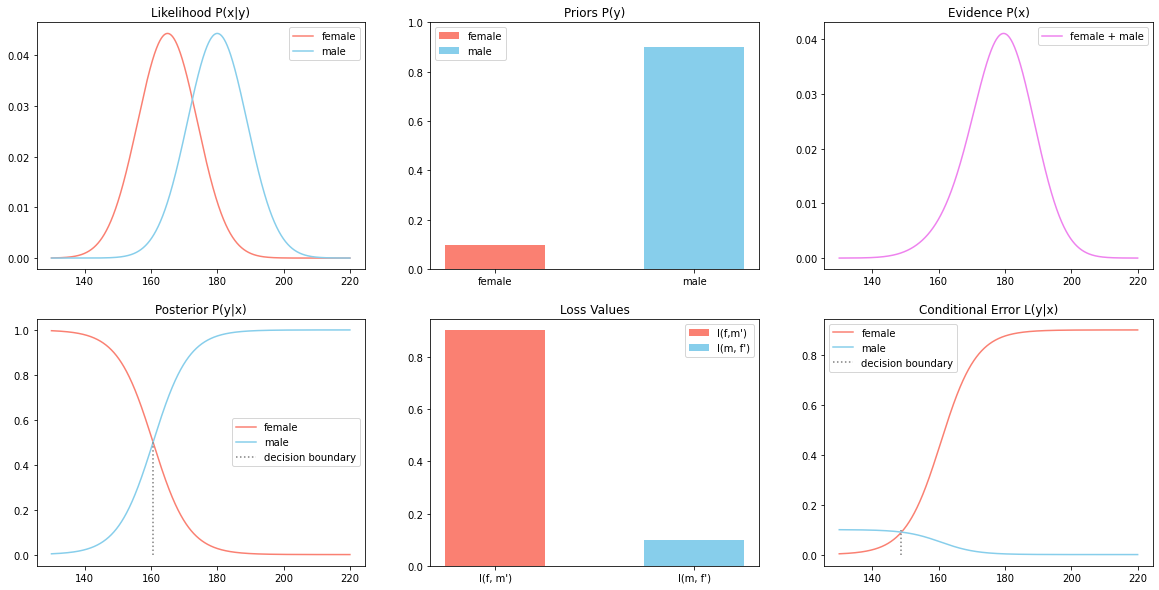

Decision boundary: 148.72936468234116


In [141]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0, 0].plot(x, female_likelihood, color="salmon", label="female")
ax[0, 0].plot(x, male_likelihood, color="skyblue", label="male")
ax[0, 0].set_title("Likelihood P(x|y)")

ax[0, 1].bar("female", female_prior["unbalanced"], width=0.5, color="salmon", label="female")
ax[0, 1].bar("male", male_prior["unbalanced"], width=0.5, color="skyblue", label="male")
ax[0, 1].set_ylim([0, 1])
ax[0, 1].set_title("Priors P(y)")

ax[0, 2].plot(x, evidence["prior_unbalanced"], color="violet", label="female + male")
ax[0, 2].set_title("Evidence P(x)")

ax[1, 0].plot(x, female_posterior["unbalanced"], color="salmon", label="female")
ax[1, 0].plot(x, male_posterior["unbalanced"], color="skyblue", label="male")
ax[1, 0].vlines(decision_boundary["unbalanced"], 0, 0.5, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 0].set_title("Posterior P(y|x)")

ax[1, 1].bar("l(f, m')", 0.9, color="salmon", width=0.5, label="l(f,m')")
ax[1, 1].bar("l(m, f')", 0.1, color="skyblue", width=0.5, label="l(m, f')")
ax[1, 1].set_title("Loss Values")

ax[1, 2].plot(x, female_conditional_error_unbalanced_loss_prior, color="salmon", label="female")
ax[1, 2].plot(x, male_conditional_error_unbalanced_loss_prior, color="skyblue", label="male")
ax[1, 2].vlines(x[np.unique(female_posterior["unbalanced"] <= 0.9, return_counts=True)[1][0] - 1], 0, 0.1, colors='gray', linestyles='dotted', label="decision boundary")
ax[1, 2].set_title("Conditional Error L(y|x)")

for ax in ax.flat:
    ax.legend()

plt.show()

print("Decision boundary:", x[np.unique(female_posterior["unbalanced"] <= 0.9, return_counts=True)[1][0] - 1])